# Pima Indian Diabetes Data
### Adapted from Pluralsight course "Understanding Machine Learning with Python" by Jerry Kurata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for inline plotting
%matplotlib inline

## Load .csv data and review it -- note zero-indexing by Pandas module

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(7)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True



## Check for null values

In [5]:
df.isnull().values.any()

False


## Check whether any columns are correlated

In [6]:
def plot_corr(df, size=11):
    """
    Plots correlation matrix for each pair of columns
    
    Blue-to-red is not-corr (or 0) to correlated (or 1)
    
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(np.arange(len(corr.columns)), corr.columns)
    plt.yticks(np.arange(len(corr.columns)), corr.columns)

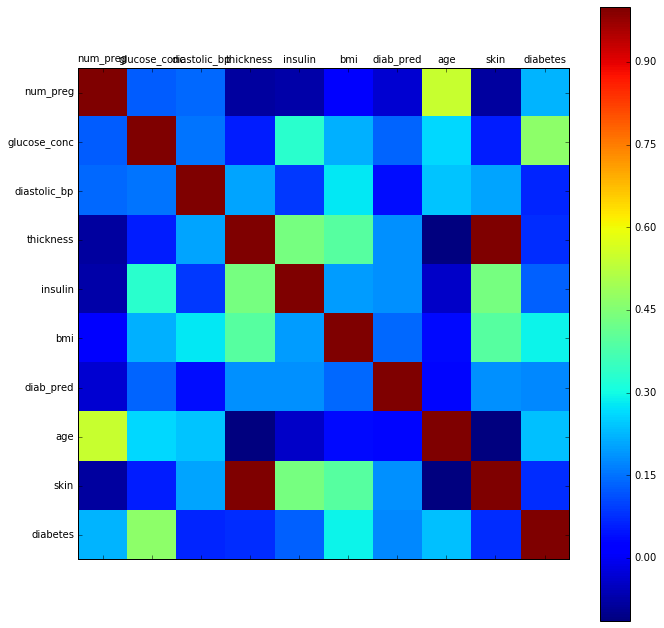

In [7]:
plot_corr(df)

### Clearly the thickness and skin columns are correlated, get rid of one of them

In [8]:
del df['skin']

In [9]:
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True


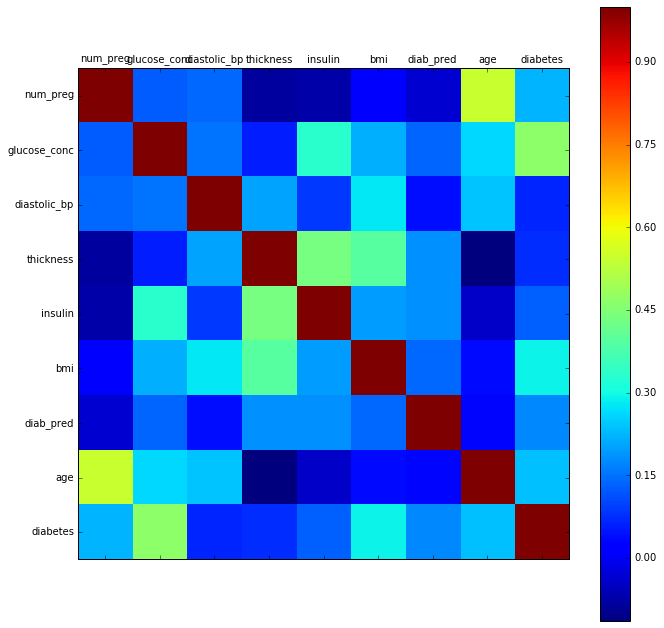

In [10]:
# double-check
plot_corr(df)

## Check Data Types

In [11]:
# Change last column "diabetes" from text to boolean
# Easiest to use a Panda map method instead of iterating (nice)
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [12]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print("Number of True Cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False Cases:  {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True Cases:  268 (34.90%)
Number of False Cases:  500 (65.10%)


## Split the data 
70% to train on, 30% to test on

In [13]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictor feature columns (8 x m)
y = df[predicted_class_names].values # predicted class (1=True, 0=False) column (1 x m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Check to ensure actually got the desired 70/30 split

In [14]:
print("{0:0.2f}% in training set".format( (1.*len(X_train))/len(df.index)*100 ) )
print("{0:0.2f}% in test set".format( (1.*len(X_test))/len(df.index)*100 ) )

69.92% in training set
30.08% in test set


### Was the predicted True/False split correctly?

In [15]:
print("Original True  :  {0} ({1:.2f}%)".format(len(df.loc[df['diabetes'] == 1]), len(df.loc[df['diabetes'] == 1])/len(df.index)*100. ))
print("Original False :  {0} ({1:.2f}%)".format(len(df.loc[df['diabetes'] == 0]), len(df.loc[df['diabetes'] == 0])/len(df.index)*100. ))
print('')
print("Training True  :  {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1])/len(y_train)*100. ))
print("Training False :  {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0])/len(y_train)*100. ))
print('')
print("Test True  :  {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1])/len(y_test)*100. ))
print("Test False :  {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0])/len(y_test)*100. ))

Original True  :  268 (34.90%)
Original False :  500 (65.10%)

Training True  :  188 (35.01%)
Training False :  349 (64.99%)

Test True  :  80 (34.63%)
Test False :  151 (65.37%)


#### The split is good

### Post-split data prep

#### Are there hidden missing values?   e.g., missing values now masquerading as zeros?

Count how many rows (for each column/feature) have zeros in them

In [16]:
print("# of total rows in the dataframe:    {0}".format(len(df)))
print("# of rows missing for glucose_conc:  {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# of rows missing for diastolic_bp:  {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# of rows missing for thickness:     {0}".format(len(df.loc[df['thickness']    == 0])))
print("# of rows missing for insulin:       {0}".format(len(df.loc[df['insulin']      == 0])))
print("# of rows missing for bmi:           {0}".format(len(df.loc[df['bmi']          == 0])))
print("# of rows missing for diab_pred:     {0}".format(len(df.loc[df['diab_pred']    == 0])))
print("# of rows missing for age:           {0}".format(len(df.loc[df['age']        == 0])))

# of total rows in the dataframe:    768
# of rows missing for glucose_conc:  5
# of rows missing for diastolic_bp:  35
# of rows missing for thickness:     227
# of rows missing for insulin:       374
# of rows missing for bmi:           11
# of rows missing for diab_pred:     0
# of rows missing for age:           0


#### That's too many rows to throw out, so *impute with the mean* where missing

In [17]:
from sklearn.preprocessing import Imputer

# Impute with mean for all 0 readings (columns are axis=0)
fill_0 = Imputer(missing_values=0, strategy='mean',axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Train with Naive Bayes algorithm

### Assume the features each follow a Gaussian dist around their mean

In [18]:
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Naive Bayes model object and train it
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Test the model's performance on the *training* data first

In [19]:
# predict the values using the training data
nb_predict_train = nb_model.predict(X_train)

# performance metrics library
from sklearn import metrics

print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_train, nb_predict_train) ))

Accuracy:  0.7542 



### Now the model's performance on the test data

In [20]:
# predict the values using the training data
nb_predict_test = nb_model.predict(X_test)

print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_test, nb_predict_test) ))

Accuracy:  0.7359 



#### That was the goal-- at least 70% accuracy at predicting whether likely to develop diabetes . . . but beware!  Look at the Confusion Matrix and compare to what ideal confusion matrix would be.  Columns are predicted values.  Left col is predicted true, right col is predicted false.   Rows are actual true, and below it actual false.  So the elements are:  
TP = True Positive  = the person actually developed diabetes AND was predicted to develop diabetes

TN = True Negative  = the person did not develop diabetes and was correctly predicted to NOT develop diabetes 

FP = False Positive = the person did not develop diabetes BUT was INCORRECTLY predicted to develop diabetes

FN = False Negative = the person actually developed diabetes BUT was INCORRECTLY predicted to NOT develop diabetes

A "perfect" classifier's confusion matrix would be:  $\begin{bmatrix} TP & FP \\ FN & TN \end{bmatrix} = \begin{bmatrix} 80 & 0 \\ 0 & 151 \end{bmatrix}$

In [21]:
print("Confusion Matrix (set 1=True to upper left, 0=False to lower right)")
metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])

Confusion Matrix (set 1=True to upper left, 0=False to lower right)


array([[ 52,  28],
       [ 33, 118]])

So our classifier is not perfect . . . is it good enough to get us 70% accuracy in predicting likelihood?

#### Generate a Classification Report to get some more statistics from the confusion matrix

In [22]:
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



"Recall" is the "true positive rate" or the "sensitivity", it is how well the model is correctly predicting diabetes when the individual in fact has diabetes.  So that's the number of true positives divided by the total people who have it:  

$\mbox{Recall} = \frac{TP}{TP+FN}$

We are 65%, below the desired 70%.

Precision is how often the patient actually had diabetes when the model said they would.  So that is:

$\mbox{Precision} = \frac{TP}{TP+FP}$

Increasing precision means fewer false positives.


### Try Random Forest, which is an ensemble algorithm that MIGHT perform better than Naive Bayes.  But, watch for overfitting!

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)  # Creates a Random Forest object
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Test it out the *training* data

In [24]:
# predict the values using the training data
rf_predict_train = rf_model.predict(X_train)

print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_train, rf_predict_train) ))

Accuracy:  0.9870 



Suspiciously high . . .
### Test it out on the *test* data

In [25]:
# predict the values using the test data
rf_predict_test = rf_model.predict(X_test)

print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_test, rf_predict_test) ))

Accuracy:  0.7100 



There should not be such a big drop in performance . . . check the recall

In [29]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0]))
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[ 43  37]
 [ 30 121]]
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



A Recall of as low as 54% means this random forest model is barely better than a coin flip at predicting who in the test set is likely to develop diabetes. . . 

Tweaking the RandomForestGenerator is probably not the answer-- already we set the "out-of-bag" parameter oob_score=True (the default value anyway). . . 

Get more data?  Not for this question. . . 

Cross-Validation (train on different subsamples of the training data set)?  No, RF already does that with an ensemble of trees through the training data. . .

So, try a different algorithm, with a more tune-able hyperparameter in the event of overfitting:

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Start out with tune-able hyperparameter C set to 0.7
lr_model= LogisticRegression(C=0.7, random_state=42)

# Train the model
lr_model.fit(X_train,y_train.ravel())

# Test the model
lr_predict_test = lr_model.predict(X_test)

# Run metrics on it
print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_test, lr_predict_test) ))
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy:  0.7446 

             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



Recall still no better . . . now fiddle with the regularization parameter using a loop

First max val of 0.613 occurred at C = 1.4


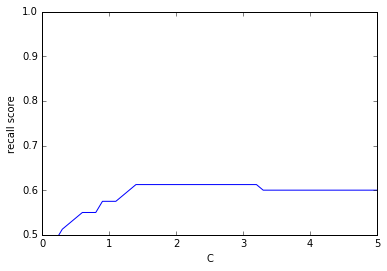

In [37]:
C_start = 0.1
C_end   = 5.0
C_inc   = 0.1
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("First max val of {0:.3f} occurred at C = {1:.1f}".format(best_recall_score,best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores)
plt.ylim(0.5,1)
plt.xlabel("C")
plt.ylabel("recall score")

#### Hmmm... this showed that playing with C has some effect . . . but not enough to reach 70%.


### Unbalanced Classes
#### We have 65% diabetes and 35% non-diabetes cases, is that imbalance an issue?  Repeat the previous loop with LR's hyperparameter class_weight='balanced'

First max val of 0.738 occurred at C = 0.3


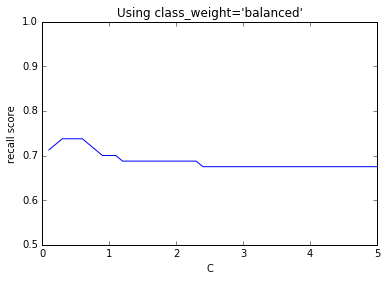

In [38]:
C_start = 0.1
C_end   = 5.0
C_inc   = 0.1
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("First max val of {0:.3f} occurred at C = {1:.1f}".format(best_recall_score,best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores)
plt.title("Using class_weight='balanced'")
plt.ylim(0.5,1)
plt.xlabel("C")
plt.ylabel("recall score")

#### Take that C value that makes the best score and re-run the model

In [39]:
lr_model = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# Run metrics on it
print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_test, lr_predict_test) ))
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy:  0.7143 

             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



Okay, that's good because Recall is now above 70% . . . but, we got best_score_C_val by actually running models on the **test** data.  So to test on a wider set of data is best, and that may mean trading off performance.  Time for . . . 
#### Cross Validation (helps here, in addition to helping with overfitting)
(This will be better than a single 3-way split of our original data frame into, say, 50% Training data, 25% Validation/Tuning data and 25% Test data.

#### K-fold Cross Validation:  divide the Training data into K-fold parts, loop through them, each time one fold is the Validation data, rest is trained on.  Then take the average best value for the tuning parameter.

Use the "CV" version of LogisticsRegression that has this functionality

### LogisticRegressionCV

In [55]:
from sklearn.linear_model import LogisticRegressionCV

# n_jobs = -1 means use all available cores, to run faster
# cv = 10 means make 10-folds within the Training set
# Cs = 3 means within each fold, make 3 attempts to find best tuning parameter
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight='balanced')
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict on the Test data

In [56]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# Run metrics on it
print("Accuracy:  {0:.4f} \n".format(metrics.accuracy_score(y_test, lr_cv_predict_test) ))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy:  0.7013 

[[ 53  27]
 [ 42 109]]
             precision    recall  f1-score   support

          1       0.56      0.66      0.61        80
          0       0.80      0.72      0.76       151

avg / total       0.72      0.70      0.71       231



### NOTE:  This new Recall value of 66% is lower than the 74% above, but this model should perform better across a *wider* range of test data.